# OpenDataScience questionnaire EDA

This notebook serves two main purposes:

- Describes audience statistics of [Open Data Science](https://t.me/opendatascience) telegram channel.
- Shows how Exploratory Data Analysis can be performed.

We will try to present some common techniques to represent data, more over we will try to show how different types of plots or data manipulation can make a plot more interpretable.

This notebook is available at the [github](https://github.com/open-data-science/ods_channel_stats_eda) repo for corrections, addictions and edits. All pull requests are welcome.

## Imports

In [23]:
import sys
from io import StringIO
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from wordcloud import WordCloud
from collections import Counter

%matplotlib inline
plt.style.use('seaborn')

## Data preparation

In [2]:
df = pd.read_csv("./input/2020_opendatascience_poll_data.csv.gz")
df.head()

,Timestamp,What is your residence country (where are you from?),Your timezone (we need that to schedule post timing better),Education,Work status,Data Science expertise level,Age,Are you satisfied with channel update frequency?,Are you satisfied with channel's material complexity?,What field are you interested in (multiple choices are possible),How did you find out about the channel?,How likely are you going to recommend a channel to your friend or colleague?,What’s the main reason for your score? *,"If you want to reach for the editors and to write something, please use the field below:"
0,2020/01/29 1:30:57 PM GMT+3,Ukraine,GMT+3,Undergrad,Student + part time remote job,Middle,18-24,"Yes, it's about perfect",It's all ok,#CV #DL #imageprocessing #videolearning;#RL #D...,Forward from a friend,5,All stuff is absolutely brilliant! Thank you f...,NaN
1,2020/01/29 1:31:19 PM GMT+3,Russia,GMT+3,Graduate,Employed,Middle,31-42,"Nope, less frequent posting will be all right ...",It's all ok,#RL #DL;#NLP #NLU #conversational #dialoguesys...,"It's been so long time ago, I can't remember (...",4,it's ok,"post some jobs with salary ranges, especially ..."
2,2020/01/29 1:32:48 PM GMT+3,Ukraine,GMT+2,PhD,Unemployed,"Novice (Studying courses, active learning)",25-30,"Yes, it's about perfect",Need more specific and complicated materials,#WhereToStart #EntryLevel #Novice #MOOC #Learn...,Telegram channel search,3,NaN,NaN
3,2020/01/29 1:33:27 PM GMT+3,Italy,GMT+1,"No degree at all, still learning / self-taught",Student,"Novice (Studying courses, active learning)",18-24,"Yes, it's about perfect",It's all ok,#CV #DL #imageprocessing #videolearning;#RL #D...,Forward from a friend,5,Mainly due to material shared,NaN
4,2020/01/29 1:33:49 PM GMT+3,Ukraine,GMT+2,Graduate,Employed,Middle,18-24,"Yes, it's about perfect",It's all ok,#RL #DL;#NLP #NLU #conversational #dialoguesys...,"It's been so long time ago, I can't remember (...",2,It's not super useful actually. Good enough to...,NaN


In [3]:
df.columns

Index(['Timestamp', 'What is your residence country (where are you from?)',
       'Your timezone (we need that to schedule post timing better)',
       'Education', 'Work status', 'Data Science expertise  level', 'Age',
       'Are you satisfied with channel update frequency?',
       'Are you satisfied with channel's material complexity?',
       'What field are you interested in (multiple choices are possible)',
       'How did you find out about the channel?',
       'How likely are you going to recommend a channel to your friend or colleague?',
       'What’s the main reason for your score? *',
       'If you want to reach for the editors and to write something, please use the field below:'],
      dtype='object')

In order to manipulate the dataset easily we will change names of columns. So we will work with shorter names.

In [4]:
mapper = {
    "Your timezone (we need that to schedule post timing better)": "Timezone",
    "Work status": "Work",
    "What is your residence country (where are you from?)": "Country",
    "Data Science expertise  level": "Experience",
    "Are you satisfied with channel update frequency?": "Sat_update",
    "Are you satisfied with channel's material complexity?": "Sat_material",
    "What field are you interested in (multiple choices are possible)": "Interests",
    "How did you find out about the channel?": "How_found",
    "How likely are you going to recommend a channel to your friend or colleague?": "Recommend",
    "What’s the main reason for your score? *": "Why",
}

df = df.rename(columns=mapper)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 557 entries, 0 to 556
Data columns (total 14 columns):
 #   Column                                                                                    Non-Null Count  Dtype 
---  ------                                                                                    --------------  ----- 
 0   Timestamp                                                                                 557 non-null    object
 1   Country                                                                                   548 non-null    object
 2   Timezone                                                                                  557 non-null    object
 3   Education                                                                                 557 non-null    object
 4   Work                                                                                      557 non-null    object
 5   Experience                                                      

In [6]:
df.Education.unique()

array(['Undergrad', 'Graduate', 'PhD',
       'No degree at all, still learning / self-taught',
       "I hold a degree in a field irrelevant to DS but as it comes to DS, I'm all self-taught",
       'Post-Doc'], dtype=object)

Now we are ready to perform our EDA. Let's go.

# 01 Countries

Let's start to see where the audience come from. We aggregate data using the value_counts() operation provided by pandas.
We obtain a DataFrame that will be fed to plotly to create the plot. Plotly works in this way:
- Provide the DataFrame
- Provide columns of the DataFrame that will be plotted

(Actually Plotly can work also with standard arrays, but here we will use always DataFrames)

In [7]:
countries = df["Country"].value_counts().to_frame()
print(countries.head()) #here names of Country are the index of the DataFrame
countries = countries.reset_index()
print(countries.head()) #here the index became an independent column and a new numeric index is created
countries = countries.rename(columns={"Country":"Count","index":"Country"}) #simply rename the column for clarity
print(countries.head())

         Country
Russia       154
India        110
Ukraine       45
Spain         30
Italy         29
     index  Country
0   Russia      154
1    India      110
2  Ukraine       45
3    Spain       30
4    Italy       29
   Country  Count
0   Russia    154
1    India    110
2  Ukraine     45
3    Spain     30
4    Italy     29


Now we are ready to use APIs of plotly to create fantastic plots.
Let's start with one of the most common charts, the Pie Chart

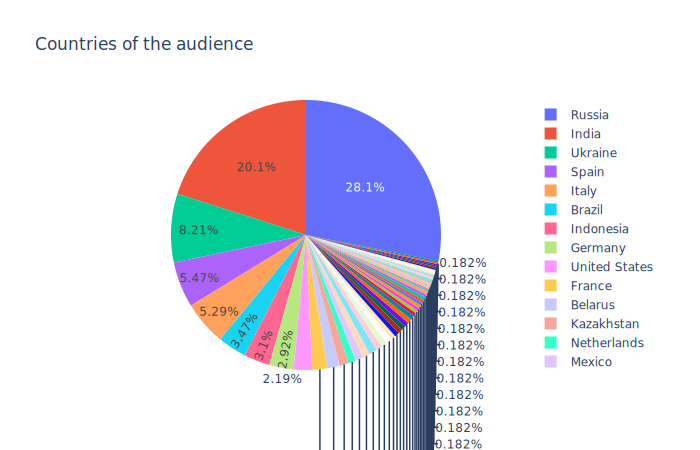

In [8]:
fig = px.pie(countries, values='Count', names='Country', title='Countries of the audience')
fig.show("svg")

It contains all information we were looking for, but there is a problem, isn't it?
Due the great fragmentation of countries, It's difficult to see where your country is (in particular if It has few interviewed).
Let's try to fix this using another plot, the Bar Plot.

Note the 'fig.show("svg")': Plotly by default displays interactive plots. But to correctly display these plots on Github we need to create static plots. If you run this notebook try to remove "svg" and see what happen.

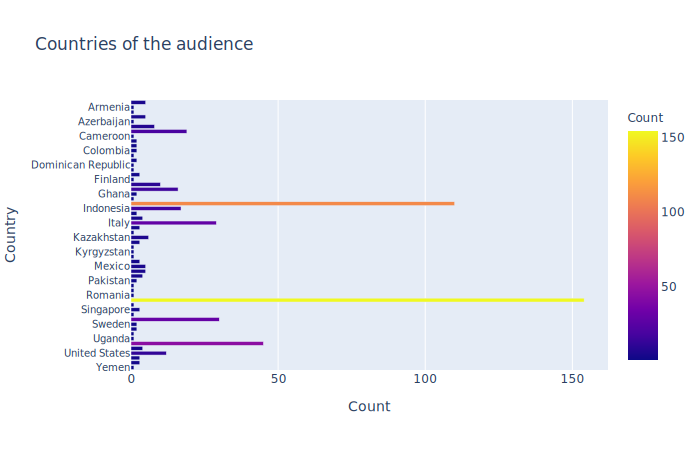

In [9]:
countries = countries.sort_values(by="Country", ascending=False) #sort value by country name
fig = px.bar(countries, x='Count', y='Country', title='Countries of the audience', 
             hover_data=['Count'], color='Count', orientation='h')
fig.update_layout(
    yaxis_tickfont_size=10
)
fig.show("svg")

With this visualization info should be slightly easier to be retrieved. But the plot is very sparse and not very beautiful. We can do better, for example choosing only the K-heighest countries.

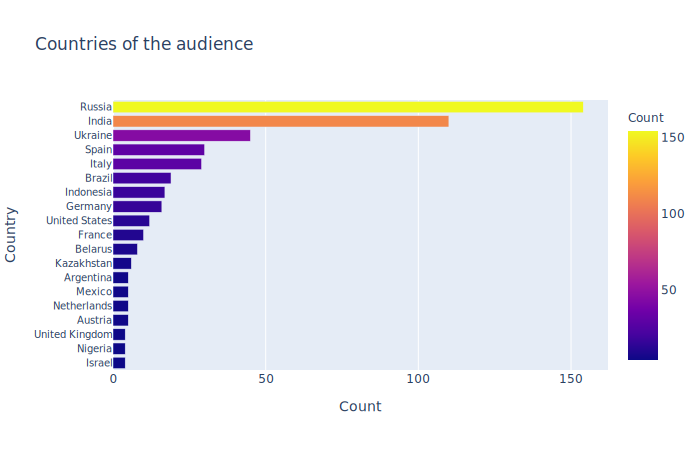

In [10]:
K = 18
countries_to_plot = countries.sort_values(by="Count", ascending=False)[K::-1] #select K countries with more responses
fig = px.bar(countries_to_plot, x='Count', y='Country', title='Countries of the audience', 
             hover_data=['Count'], color='Count', orientation='h')
fig.update_layout(
    yaxis_tickfont_size=10
)
fig.show("svg")

# 02 Work status

Let's then analyze the people's work status.
We process data like we did previously.

In [11]:
works = df["Work"].value_counts().to_frame()
print(works.head()) 
works = works.reset_index()
print(works.head()) 
works = works.rename(columns={"Work":"Count","index":"Work"}) #simply rename the column for clarity
print(works.head())

                                    Work
Employed                             303
Student                              107
Student + part time job               52
Self-employed (co-founder / owner)    25
Employed remotely                     23
                                index  Work
0                            Employed   303
1                             Student   107
2             Student + part time job    52
3  Self-employed (co-founder / owner)    25
4                   Employed remotely    23
                                 Work  Count
0                            Employed    303
1                             Student    107
2             Student + part time job     52
3  Self-employed (co-founder / owner)     25
4                   Employed remotely     23


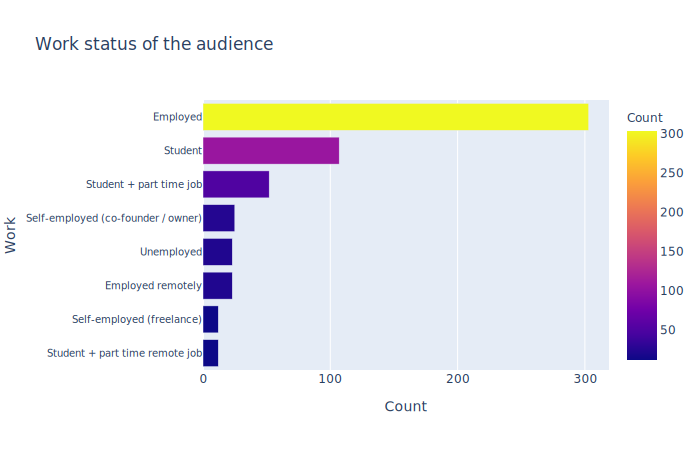

In [12]:
works = works.sort_values(by="Count", ascending=True)
fig = px.bar(works, x='Count', y='Work',  title='Work status of the audience', 
             hover_data=['Count'], color='Count', orientation='h')
fig.update_layout(
    yaxis_tickfont_size=10
)

fig.show("svg")

<a name="student"></a>
# 03 Countries and Work Status together

Now that we have have an idea of where people are from and which is their work status, let's try to combine these 2 information.
Our objective is now to represent the relation between each country and the status work of the audience.
To accomplish this we will use the [Violin Plot](https://towardsdatascience.com/violin-plots-explained-fb1d115e023d)
We will plot only the top 5 countries.

In [13]:
K = 5
top_K_countries = countries_to_plot["Country"][-K:]
df_top_countries = df.loc[df['Country'].isin(top_K_countries)].copy()

Before creating the plot we change the original possible responses into a simplified and shorter version, in order to enable the labels to better fit the plot.

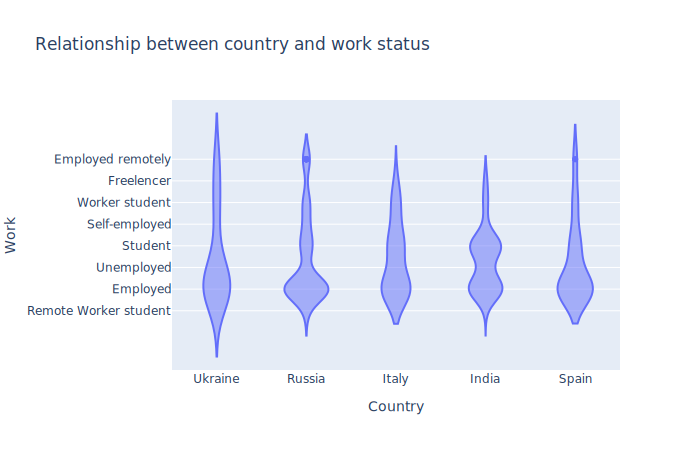

In [14]:
mapper = {
    "Employed remotely": "Employed remotely",
    "Self-employed (freelance)" : "Freelencer",
    "Student + part time job": "Worker student",
    "Self-employed (co-founder / owner)":"Self-employed",
    "Student": "Student",
    "Unemployed": "Unemployed",
    "Employed": "Employed",
    "Student + part time remote job": "Remote Worker student"
}
df_top_countries["Work"] = df_top_countries["Work"].map(mapper)

fig = px.violin(df_top_countries, y="Work", x="Country", title="Relationship between country and work status",
          hover_data=df.columns)
fig.show("svg")

So we can conclude that generally the distribution is quite uniform across different countries, except for India where the number of student is slightly greater then the others top 5 countries.

<a name="age"></a>
# 04 Age

We can adopt the Violin Plot also to represent the age distribution of the audience among countries.

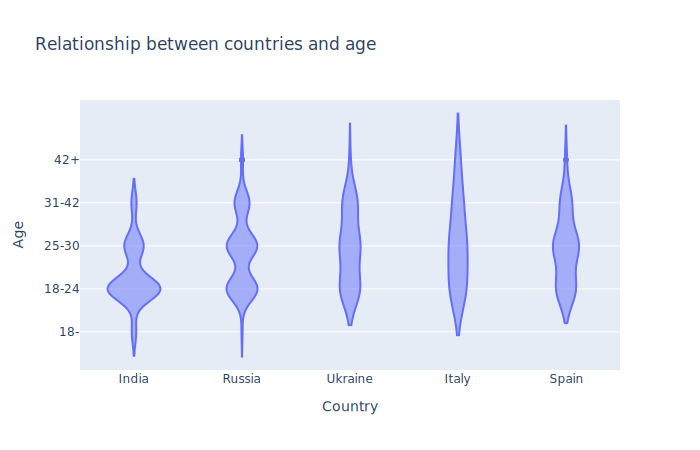

In [15]:
df_top_countries_by_age = df_top_countries.sort_values(by="Age", ascending=True)
fig = px.violin(df_top_countries_by_age, y="Age", x="Country", title="Relationship between countries and age",
                hover_data=df.columns)
fig.show("svg")

# 05 Is the audience satified about the material and update frequency?

One of the main reasons behind the survey is to understand if the audience is satified about the complexity of the material.
To better understand if the audience is satisfied we can (again) use a Violin Plot.

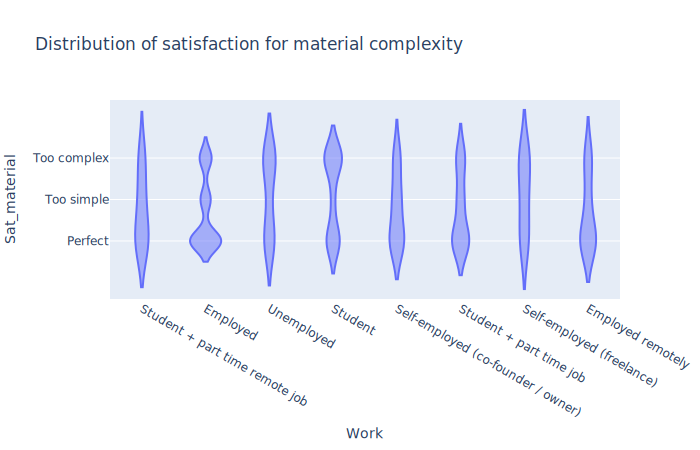

In [16]:
mapper = {
    "Need more beginners' stuff": "Too complex",
    "Need more specific and complicated materials" : "Too simple",
    "It's all ok": "Perfect"
}

df["Sat_material"] = df["Sat_material"].map(mapper)
fig = px.violin(df, y="Sat_material", x="Work",hover_data=df.columns,
                title='Distribution of satisfaction for material complexity')
fig.show("svg")

Let's do the same for the update frequency.

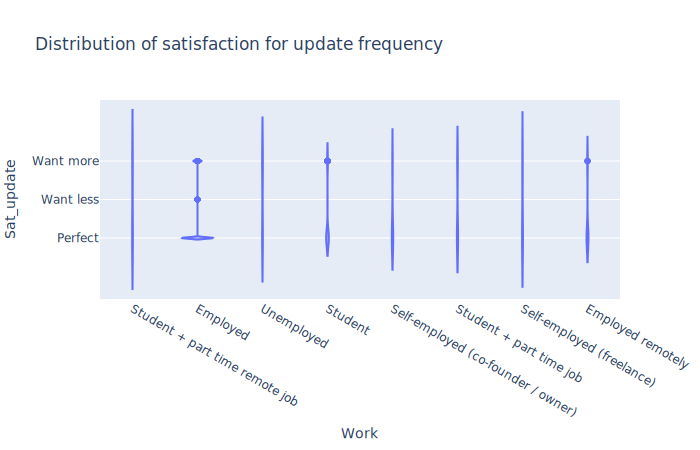

In [17]:
mapper = {
    "Nope, need more information": "Want more",
    "Nope, less frequent posting will be all right by me" : "Want less",
    "Yes, it's about perfect": "Perfect"
}

df["Sat_update"] = df["Sat_update"].map(mapper)
fig = px.violin(df, y="Sat_update", x="Work",hover_data=df.columns, 
                title='Distribution of satisfaction for update frequency')
fig.show("svg")

In this case the plot is meaningless, thus another perspective is required.
Let's try with a Bar Plot.

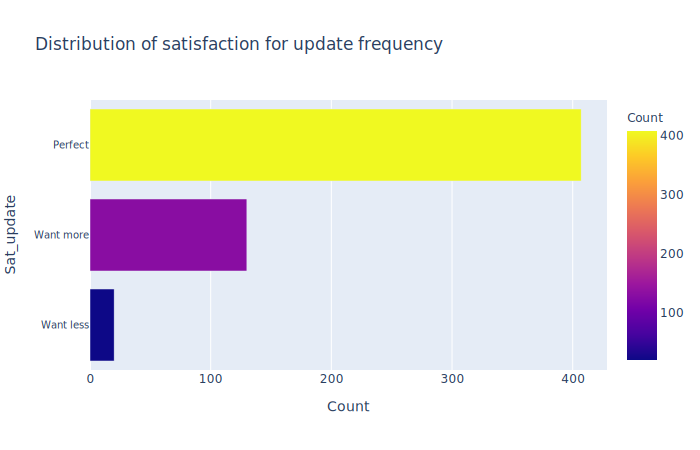

In [18]:
update_freq = pd.DataFrame(df.groupby("Sat_update").size(), columns=["Count"]).reset_index().sort_values(by="Count")
fig = px.bar(update_freq, x='Count', y='Sat_update',  title='Distribution of satisfaction for update frequency', 
             hover_data=['Count'], color='Count', orientation='h')
fig.update_layout(
    yaxis_tickfont_size=10
)
fig.show("svg")

# 06 Interests

Given the people interests, create a WordCloud to see trends of topics

In [19]:
def display_wordcloud_image(text:str):
    """Function for displaying wordcloud of the provided text."""
    plt.figure(figsize = (12, 8))
    wordcloud = WordCloud(max_font_size=None, background_color='white', collocations=True,
                          width=1200, height=1000).generate(text)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

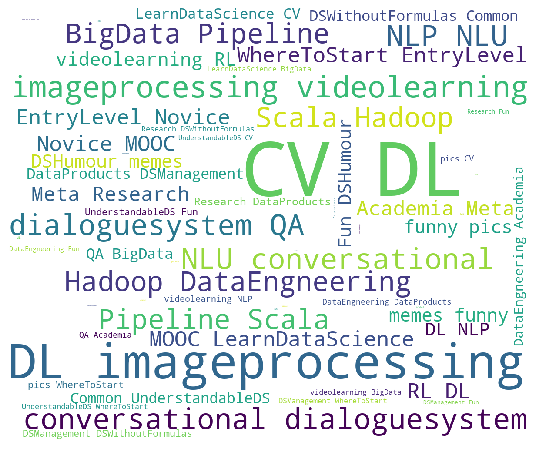

In [20]:
text = ' '.join(df['Interests'].values)
display_wordcloud_image(text)

We could also see if particular trends occures in different countries. We could use a WordCloud for each countries or we could select the top-3 topics of countries. Let's try with the hardest way, the latter one.

First let's select a subset of countries to plot like we did before. We'll keep the top-4 countries.

In [21]:
K = 4
top_K_countries = countries_to_plot["Country"][-K:]
df_top_countries = df.loc[df['Country'].isin(top_K_countries)].copy()

In order to organize the plot into 4 different subplots (one for each country) we need to use graph_objects and make_subplots.
After importing necessary packages we create a grouby object on which we apply a function that extract the most common topics in each group.
Counter is an useful class that allows you to count items easily without explicitly iterating over all elements.

In [24]:
specs = [[{'type':'domain'}, {'type':'domain'}], [{'type':'domain'}, {'type':'domain'}]]

def countries_groupper(x):
    """Groups countries."""
    #will looks like: [('#WhereToStart', 81), ('#EntryLevel', 81), ('#Novice', 81)]
    most_common = Counter(x["Interests"].sum().split()).most_common(3)  
    #extract the first element, the label
    labels = [e[0] for e in most_common] 
    #extract the second element, the value
    values = [e[1] for e in most_common] 
    
    return labels, values

g = df_top_countries.groupby("Country").apply(countries_groupper)

Then we create each subplot, add each subplot to the main plot and show all togheter.

India ['#EntryLevel', '#Novice', '#MOOC'] [81, 81, 81]
Russia ['#DL', '#imageprocessing', '#NLU'] [96, 95, 77]
Spain ['#DL', '#imageprocessing', '#Meta'] [20, 20, 17]
Ukraine ['#DL', '#imageprocessing', '#NLU'] [35, 35, 25]


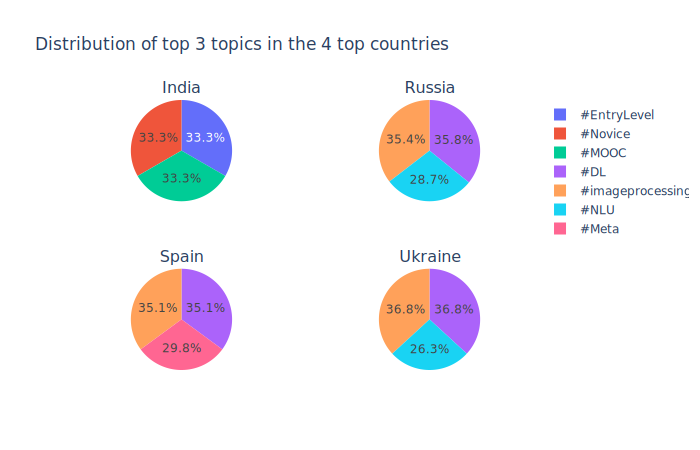

In [25]:
fig = None
r , c = 1 , 1 #stands for row and column
for country,(label,value) in zip(g.index, g.values):
    print(country,label,value)
    
    if fig is None:
        fig = make_subplots(rows=2, cols=2, specs=specs, subplot_titles=g.index) #we create a grid of 2x2. Each cell will contain a plot
        
    fig.add_trace(go.Pie(labels=label, values=value),r,c) 
    c = c + 1 #to place correcly each subplot into the 2x2 grid
    if c % 3 == 0:
        r = r + 1
        c = 1
    
# Tune layout
fig.update(layout_title_text='Distribution of top 3 topics in the 4 top countries',
           layout_showlegend=True)
fig = go.Figure(fig)
fig.show("svg")

From this plot we can see that DeepLearning and image processing are very popular across countries, while in India people demand for beginners stuff.
This can be derived by the fact that, as we saw in **03** and **04** India has the highest percentage of student and people ranging from 18 to 24 years old.

In [26]:
def load_input_data():
    """Loads data of all filled questionnairies."""
    df = pd.read_csv('./input/2020_opendatascience_poll_data.csv.gz', compression='gzip')
    df.columns = ['Timestamp', 'Country', 'Timezone', 'Education', 'Work status', 'Expertise', 'Age',
                  'Channel frequency satisfaction', 'Channel complexity satisfaction', 'Fields of interest',
                  'Source', 'Recommend chance', 'Score reason', 'Comment']
    df['Timestamp'] = pd.to_datetime(df['Timestamp'])
    return df

df = load_input_data()

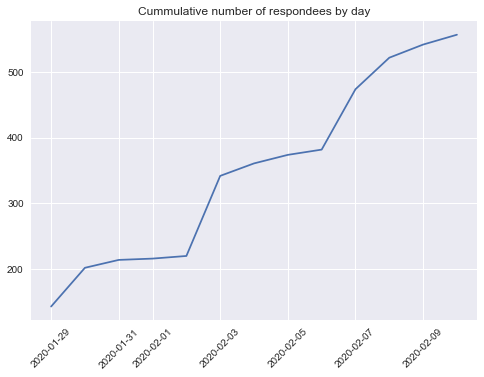

In [27]:
df['Timestamp'].dt.date.value_counts().sort_index().cumsum().plot()
plt.xticks(rotation=45);
plt.title('Cummulative number of respondees by day');

In [4]:
df.head()

,Timestamp,Country,Timezone,Education,Work status,Expertise,Age,Channel frequency satisfaction,Channel complexity satisfaction,Fields of interest,Source,Recommend chance,Score reason,Comment
0,2020-01-29 13:30:57-03:00,Ukraine,GMT+3,Undergrad,Student + part time remote job,Middle,18-24,"Yes, it's about perfect",It's all ok,#CV #DL #imageprocessing #videolearning;#RL #D...,Forward from a friend,5,All stuff is absolutely brilliant! Thank you f...,NaN
1,2020-01-29 13:31:19-03:00,Russia,GMT+3,Graduate,Employed,Middle,31-42,"Nope, less frequent posting will be all right ...",It's all ok,#RL #DL;#NLP #NLU #conversational #dialoguesys...,"It's been so long time ago, I can't remember (...",4,it's ok,"post some jobs with salary ranges, especially ..."
2,2020-01-29 13:32:48-03:00,Ukraine,GMT+2,PhD,Unemployed,"Novice (Studying courses, active learning)",25-30,"Yes, it's about perfect",Need more specific and complicated materials,#WhereToStart #EntryLevel #Novice #MOOC #Learn...,Telegram channel search,3,NaN,NaN
3,2020-01-29 13:33:27-03:00,Italy,GMT+1,"No degree at all, still learning / self-taught",Student,"Novice (Studying courses, active learning)",18-24,"Yes, it's about perfect",It's all ok,#CV #DL #imageprocessing #videolearning;#RL #D...,Forward from a friend,5,Mainly due to material shared,NaN
4,2020-01-29 13:33:49-03:00,Ukraine,GMT+2,Graduate,Employed,Middle,18-24,"Yes, it's about perfect",It's all ok,#RL #DL;#NLP #NLU #conversational #dialoguesys...,"It's been so long time ago, I can't remember (...",2,It's not super useful actually. Good enough to...,NaN


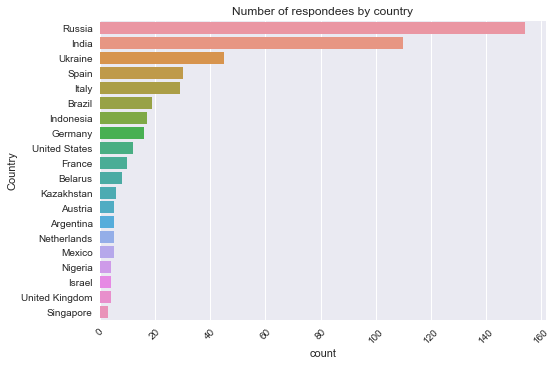

In [5]:
sns.countplot(y='Country', data=df, orient='h', order=df['Country'].value_counts().index[:20])
plt.xticks(rotation=45);
plt.title('Number of respondees by country');

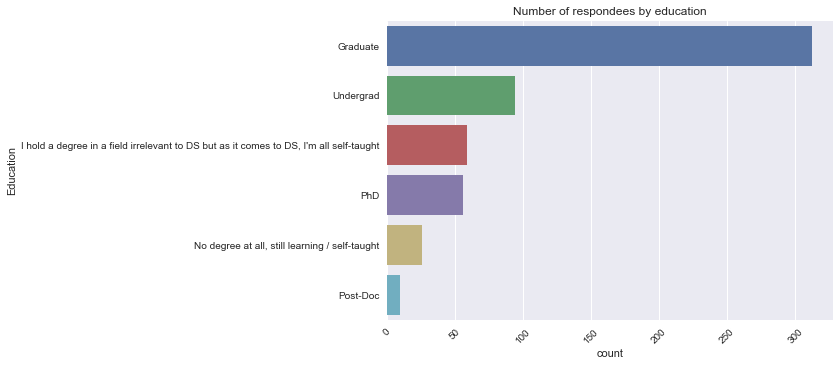

In [6]:
sns.countplot(y='Education', data=df, orient='h', order=df['Education'].value_counts().index)
plt.xticks(rotation=45);
plt.title('Number of respondees by education');

In [7]:
pd.crosstab(df['Country'], df['Education'], normalize='index')

Education,Graduate,"I hold a degree in a field irrelevant to DS but as it comes to DS, I'm all self-taught","No degree at all, still learning / self-taught",PhD,Post-Doc,Undergrad
Country,,,,,,
Argentina,0.600000,0.000000,0.200000,0.000000,0.000000,0.200000
Armenia,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Australia,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Austria,0.200000,0.200000,0.000000,0.600000,0.000000,0.000000
Azerbaijan,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Belarus,0.750000,0.125000,0.000000,0.000000,0.000000,0.125000
Brazil,0.736842,0.052632,0.000000,0.052632,0.052632,0.105263
Cameroon,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
Canada,0.500000,0.000000,0.000000,0.000000,0.000000,0.500000


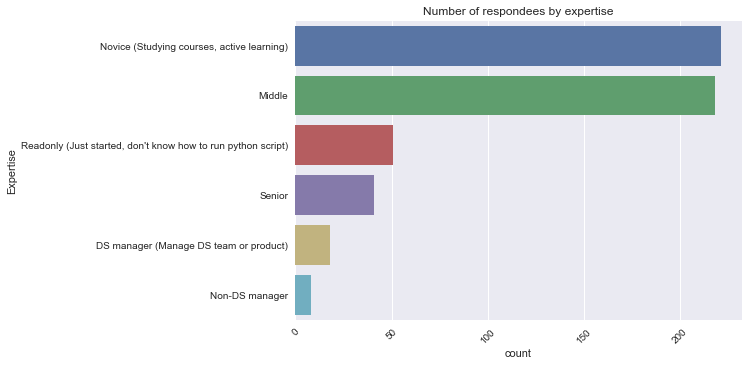

In [8]:
sns.countplot(y='Expertise', data=df, orient='h', order=df['Expertise'].value_counts().index)
plt.xticks(rotation=45);
plt.title('Number of respondees by expertise');

In [9]:
pd.crosstab(df['Education'], df['Expertise']).style.background_gradient(cmap='viridis', low=.8, high=0.2)

Expertise,DS manager (Manage DS team or product),Middle,Non-DS manager,"Novice (Studying courses, active learning)","Readonly (Just started, don't know how to run python script)",Senior
Education,,,,,,
Graduate,7,141,2,107,31,24
"I hold a degree in a field irrelevant to DS but as it comes to DS, I'm all self-taught",4,17,0,36,1,1
"No degree at all, still learning / self-taught",0,4,1,18,3,0
PhD,6,23,4,9,1,13
Post-Doc,1,4,0,3,0,2
Undergrad,0,29,1,48,15,1


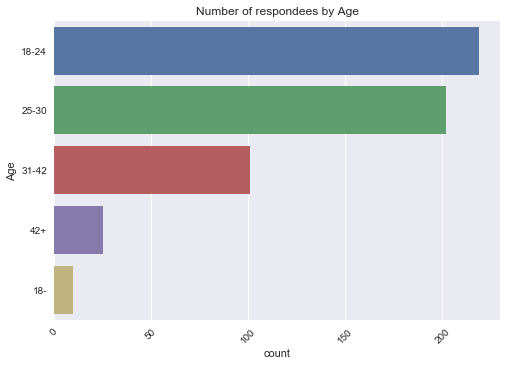

In [10]:
sns.countplot(y='Age', data=df, orient='h', order=df['Age'].value_counts().index)
plt.xticks(rotation=45);
plt.title('Number of respondees by Age');

In [11]:
pd.crosstab(df['Education'], df['Age']).style.background_gradient(cmap='viridis', low=.8, high=0.2)

Age,18-,18-24,25-30,31-42,42+
Education,,,,,
Graduate,1,100,141,55,15
"I hold a degree in a field irrelevant to DS but as it comes to DS, I'm all self-taught",0,15,25,15,4
"No degree at all, still learning / self-taught",3,17,1,5,0
PhD,0,8,22,21,5
Post-Doc,0,1,4,4,1
Undergrad,6,78,9,1,0


In [12]:
pd.crosstab(df['Expertise'], df['Age']).style.background_gradient(cmap='viridis', low=.8, high=0.2)

Age,18-,18-24,25-30,31-42,42+
Expertise,,,,,
DS manager (Manage DS team or product),0,1,7,7,3
Middle,2,82,88,40,6
Non-DS manager,0,0,3,5,0
"Novice (Studying courses, active learning)",4,104,69,33,11
"Readonly (Just started, don't know how to run python script)",4,24,14,5,4
Senior,0,8,21,11,1


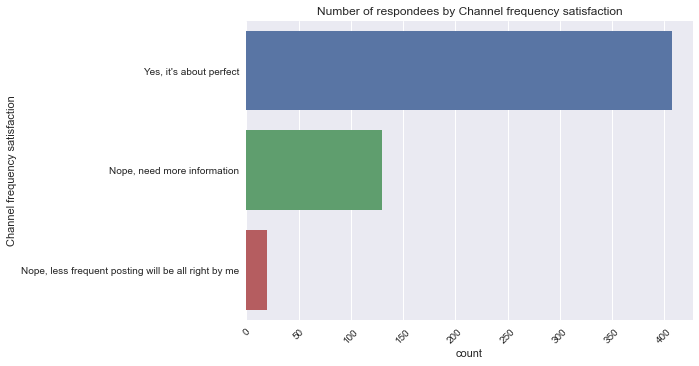

In [13]:
sns.countplot(y='Channel frequency satisfaction', data=df, orient='h', order=df['Channel frequency satisfaction'].value_counts().index)
plt.xticks(rotation=45);
plt.title('Number of respondees by Channel frequency satisfaction');

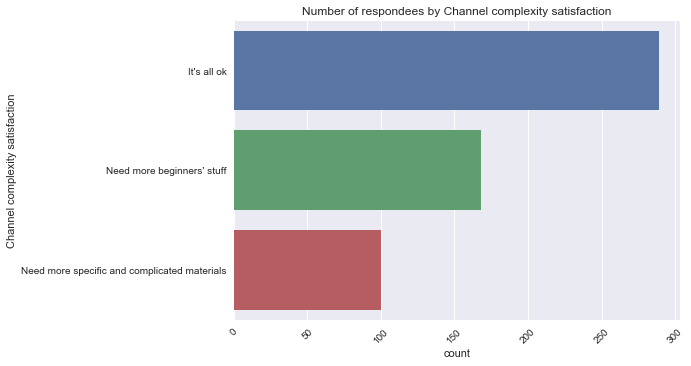

In [14]:
sns.countplot(y='Channel complexity satisfaction', data=df, orient='h', order=df['Channel complexity satisfaction'].value_counts().index)
plt.xticks(rotation=45);
plt.title('Number of respondees by Channel complexity satisfaction');

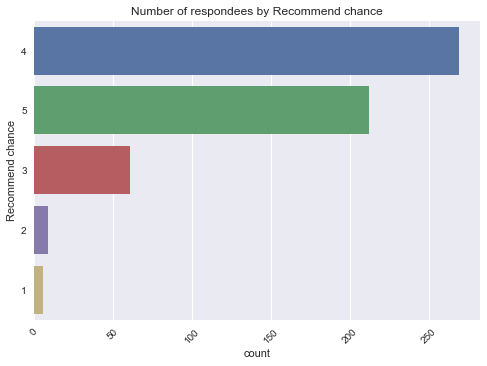

In [15]:
sns.countplot(y='Recommend chance', data=df, orient='h', order=df['Recommend chance'].value_counts().index)
plt.xticks(rotation=45);
plt.title('Number of respondees by Recommend chance');

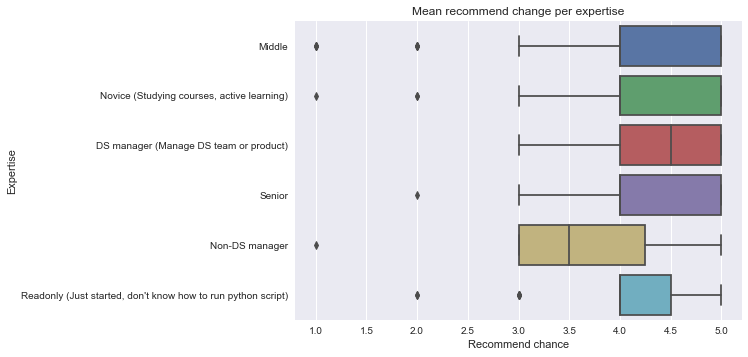

In [16]:
sns.boxplot(y='Expertise', x='Recommend chance', data=df, orient='h');
plt.title('Mean recommend change per expertise');

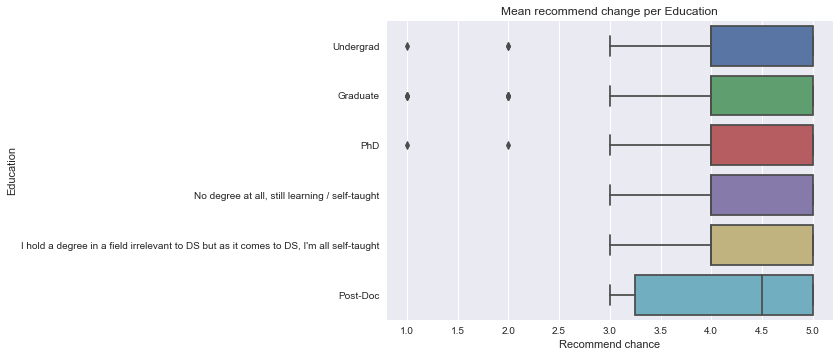

In [17]:
sns.boxplot(y='Education', x='Recommend chance', data=df, orient='h');
plt.title('Mean recommend change per Education');

/Users/kupa/Library/Caches/pypoetry/virtualenvs/ods-channel-stats-eda-5hJ1F2Av-py3.7/lib/python3.7/site-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/kupa/Library/Caches/pypoetry/virtualenvs/ods-channel-stats-eda-5hJ1F2Av-py3.7/lib/python3.7/site-packages/seaborn/categorical.py:3675: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


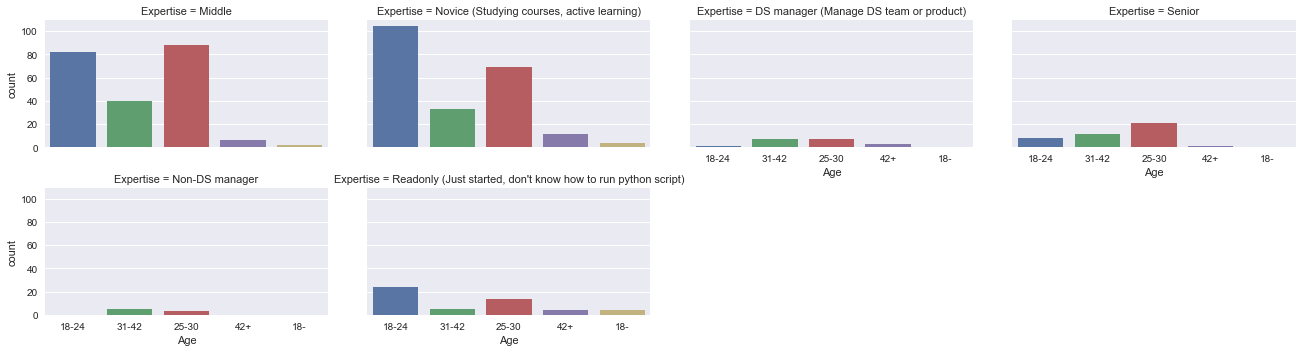

In [18]:
sns.factorplot("Age", col="Expertise",
               col_wrap=4, data=df,
               kind="count", size=2.5, aspect=1.8)

/Users/kupa/Library/Caches/pypoetry/virtualenvs/ods-channel-stats-eda-5hJ1F2Av-py3.7/lib/python3.7/site-packages/seaborn/axisgrid.py:861: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  self.fig.tight_layout()


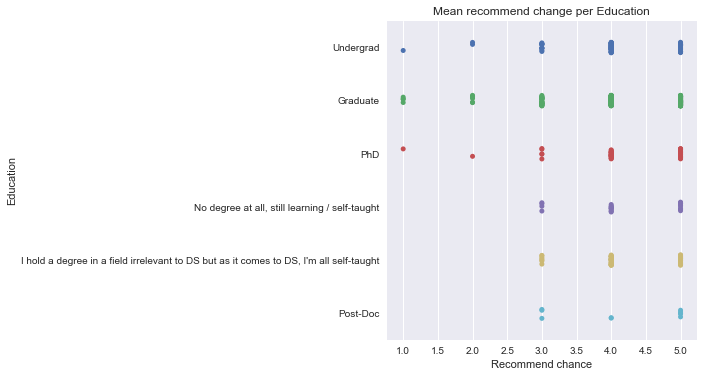

In [19]:
sns.catplot(y='Education', x='Recommend chance', data=df, orient='h');
plt.title('Mean recommend change per Education');

In [20]:
def display_wordcloud_image(text:str):
    """Function for displaying wordcloud of the provided text."""
    plt.figure(figsize = (12, 8))
    wordcloud = WordCloud(max_font_size=None, background_color='white', collocations=True,
                          width=1200, height=1000).generate(text)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

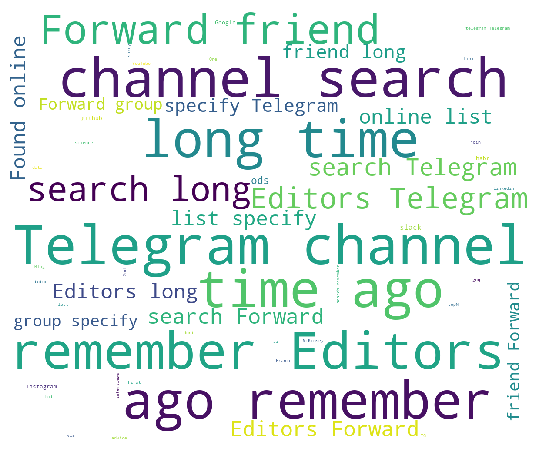

In [21]:
text = ' '.join(df['Source'].values)
display_wordcloud_image(text)

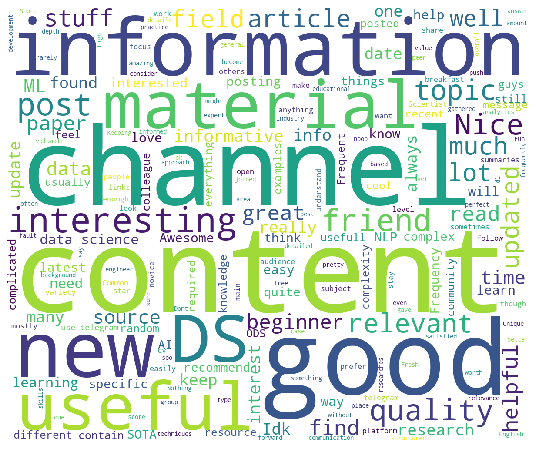

In [22]:
text = ' '.join(df['Score reason'].fillna('').values)
display_wordcloud_image(text)

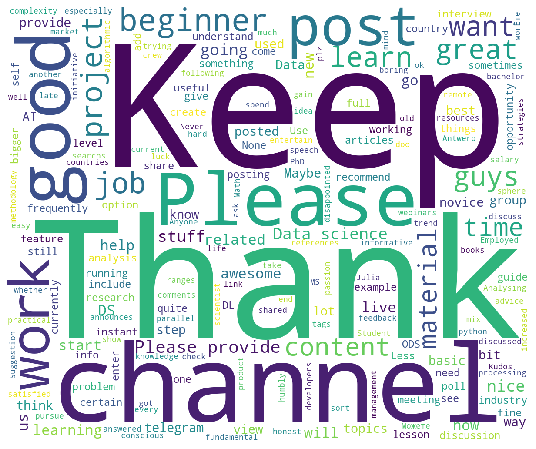

In [23]:
text = ' '.join(df['Comment'].fillna('').values)
display_wordcloud_image(text)

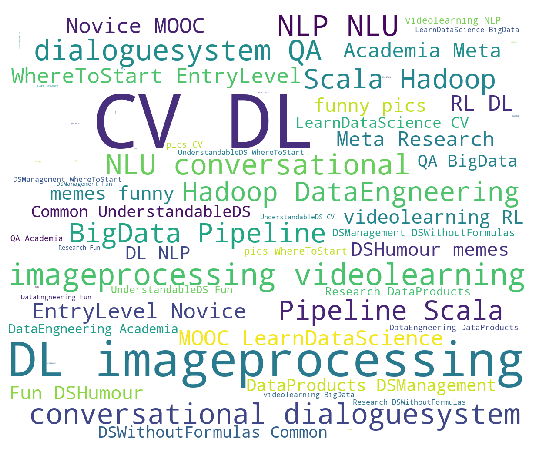

In [24]:
text = ' '.join(
    [i.replace(';', ' ').replace('#', ' ').replace('  ', ' ') for i in df['Fields of interest'].values]
)
display_wordcloud_image(text)